In [111]:
import pandas as pd
import numpy as np

In [112]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# 2.2 Data cleaning

In [113]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [114]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [115]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [116]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [117]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

# 2.3 EDA

In [118]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

## Distribution of price

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

- MSRP has a long tail distribution
- This distribution isn't good for ML as the tail will confuse the model
    - To get rid of it we can apply the logarithmic distribution to get more compact values

<Axes: xlabel='msrp', ylabel='Count'>

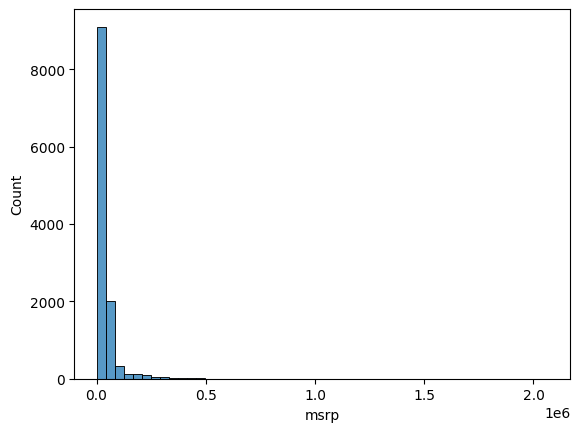

In [120]:
sns.histplot(df['msrp'], bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

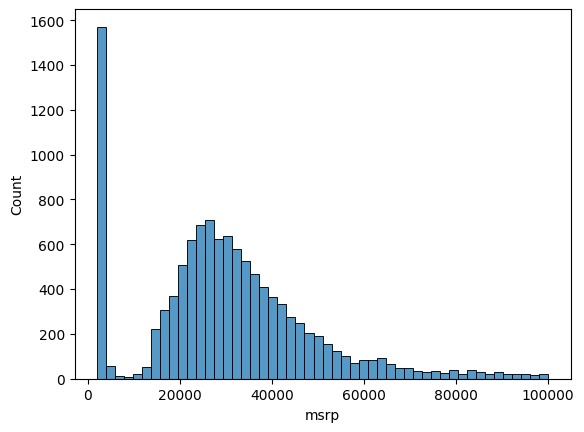

In [121]:
sns.histplot(df['msrp'][df['msrp'] < 100000], bins=50)

In [122]:
arr = np.array([0, 1, 10, 100, 1000, 10000, 100000]) # add 1 to avoid log(0) ->  RuntimeWarning: divide by zero
np.log(arr + 1)

array([ 0.        ,  0.69314718,  2.39789527,  4.61512052,  6.90875478,
        9.21044037, 11.51293546])

In [123]:
# alternative way to avoid log(0)
np.log1p(arr)

array([ 0.        ,  0.69314718,  2.39789527,  4.61512052,  6.90875478,
        9.21044037, 11.51293546])

In [124]:
price_logs = np.log1p(df['msrp'])
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

- The graph is now normally distributed -> more ideal for modelling

<Axes: xlabel='msrp', ylabel='Count'>

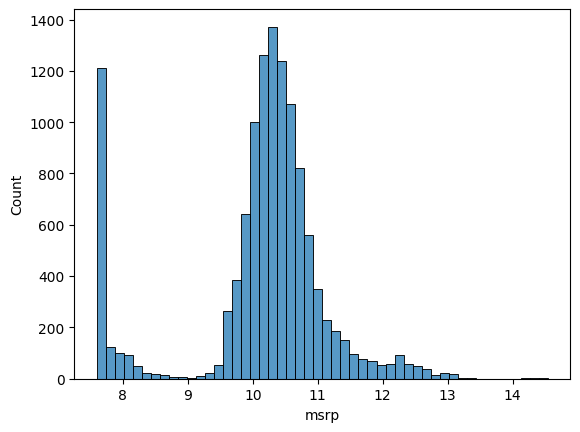

In [125]:
sns.histplot(price_logs, bins=50)

## Missing values

In [126]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# 2.4 Setting up the validation framework

In [127]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)

n_val, n_test, n_train

(2382, 2382, 7150)

In [128]:
# not shuffled hence not random
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train + n_val:]


In [129]:
# add randomness to data split
idx = np.arange(n)

np.random.seed(2)
np.random.shuffle(idx)

In [130]:
n_train

7150

In [131]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [132]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [133]:
# we don't need the index so we can drop it, was randomly shuffled
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [134]:
# get target variable/label/dependent variable
y_train = np.log1p(df_train['msrp']).values
y_val = np.log1p(df_val['msrp']).values
y_test = np.log1p(df_test['msrp']).values

In [135]:
# delete to avoid using it as a feature by mistake - to avoid data leakage and overfitting
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [136]:
df_train.shape, df_val.shape, df_test.shape

((7150, 15), (2382, 15), (2382, 15))

# 2.5 Linear regression

In [137]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

Simple linear regression formula:

$g(x_i) = w_0 + x_{i1} \cdot w_1 + x_{i2} \cdot w_2 + ... + x_{in} \cdot w_n$

Further simplified to:

$g(x_i) = w_0 + \displaystyle\sum_{j=1}^{n} w_j \cdot x_{ij}$

The linear regression formula is the sum of the bias term \( $w_0$ \), what we would have guessed the prediction to be, and each of the feature values multiplied by their corresponding weights as \( $x_{i1} \cdot w_1 + x_{i2} \cdot w_2 + ... + x_{in} \cdot w_n$ \)

In [138]:
xi = [453, 11, 86] # engine_hp, city_mpg and popularity (features)
# w0 = 0 # bias term
# w = [1, 1, 1] # weights vector

w0 = 7.17 # bias term
w = [0.01, 0.04, 0.002] # weights vector

In [139]:
# implement simple linear regression formula
def linear_regression(xi):
    assert len(xi) == len(w)

    n = len(xi)

    pred = w0

    for j in range(n):
        pred += w[j] * xi[j]

    return pred
    

In [140]:
y = linear_regression(xi) # in log hence we need to convert it back to normal
np.expm1(y) # exp(y) - 1

np.float64(222347.2221101062)

# 2.6  Linear regression vector form

The formula of linear regression can be synthesized with the dot product between features and weights. The feature vector includes the *bias* term (baseline) with an *x* value of 1, such as $w_{0}{x_{i0}},\ where\ x_{i0} = 1\ for\ w_0$

When all the records are included, the linear regression can be calculated with the dot product between ***feature matrix*** and ***vector of weights***, obtaining the `y` vector of predictions

In [141]:
def dot(x1, w):
    n = len(x1)

    res = 0

    for j in range(n):
        res += w[j] * x1[j]

    return res

def linear_regression(xi):
    return w0 + dot(xi, w)


In [142]:
# adding bias term to the weights vector
w_new = [w0] + w

def linear_regression(xi):
    xi = [1] + xi
    # vector-vector multiplication
    return dot(xi, w_new)

In [143]:
linear_regression(xi)

12.312

In [144]:
# weight, engine_hp, city_mpg and popularity (features)
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

x = [x1, x2, x10]
x = np.array(x)
x

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [145]:
def linear_regression(X):
    # matrix-vector multiplication
    return X.dot(w_new)

linear_regression(x)

array([12.38 , 13.552, 12.312])

# 2.7 Training a linear regression model

Obtaining predictions as close as possible to $y$ target values requires the calculation of weights from the general
linear regression equation

The feature matrix does not have an inverse because it is not square, so it is required to obtain an approximate solution, which can be obtained using the **Gram matrix** (multiplication of feature matrix ($X$) and its transpose ($X^T$))

The vector of weights or coefficients $w$ obtained with this formula is the closest possible solution to the LR system.

Normal equation:

$w$ = $(X^TX)^{-1}X^Ty$

Where:

$X^TX$ is the Gram Matrix

[Further reading on the normal equation](https://www.geeksforgeeks.org/ml-normal-equation-in-linear-regression/)

In [184]:
X = [
        [148, 24, 1385],
        [132, 25, 2031],
        [453, 11, 86],
        [158, 24, 185],
        [172, 25, 231],
        [413, 11, 86],
        [38, 54, 185],
        [142, 25, 431],
        [453, 31, 86]
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  231],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [185]:
# y = [100, 200, 150, 250, 100, 200, 150, 250, 120]
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [188]:
def train_linear_regression(X, y):
    # add bias/baseline term to the features matrix
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X) # Gram matrix
    XTX_inv = np.linalg.inv(XTX)

    XTX.dot(XTX_inv).round(1) # Should be an identity matrix

    w_full = XTX_inv.dot(X.T).dot(y) # linear regression normal equation
    return w_full[0], w_full[1:]

In [189]:
train_linear_regression(X, y)

(np.float64(26028.014424920224),
 array([ -16.38841139, -201.84931491,   -1.32036289]))

# 2.8 Car price baseline model

In [195]:
df_train.dtypes[df_train.dtypes != 'object']

year                  int64
engine_hp           float64
engine_cylinders    float64
number_of_doors     float64
highway_mpg           int64
city_mpg              int64
popularity            int64
dtype: object

In [208]:
# linear regression only applies to numerical features
# therefore, only the numerical features from df_train are used for the feature matrix
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [209]:
# LR model can't handle missing values
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [237]:
# # set to 0 for simplicity, will be more appropriate to use a non-zero value as the filler (e.g. mean, median, mode)
# X_train = df_train[base].fillna(0).values # model will ignore the missing values

## Prepare X

In [273]:
def prepare_X(df):
    # engineer features
    df = df.copy() # make a copy to avoid changing the original dataframe
    df['age'] = df.year.max() - df.year

    features = base + ['age']

    # select numerical features and fill missing values for LR model
    df_num = df[features]
    X = df_num.fillna(0).values
    
    return X

In [274]:
X_train = prepare_X(df_train)

w0, w = train_linear_regression(X_train, y_train)
w0, w # we can use the weights to make predictions

(np.float64(9.286850605506613),
 array([ 3.87296543e-03,  7.24889532e-02, -2.59712372e-03,  1.10445120e-02,
        -4.77015685e-05, -9.31651725e-02]))

In [275]:
y_pred = w0 + X_train.dot(w)
y_pred

array([ 9.42481528,  9.71833495, 10.23946388, ..., 10.74368095,
       12.14263879, 10.47222446])

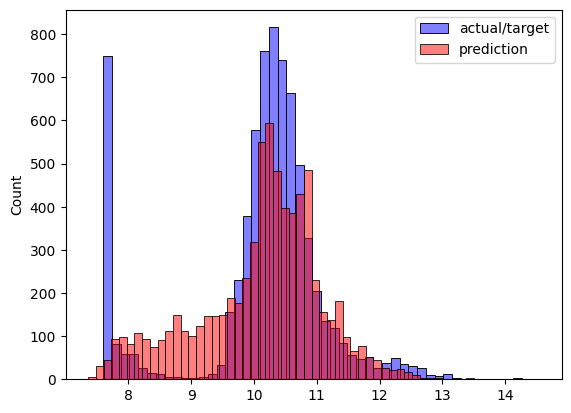

In [276]:
# check how the predictions compare to the actual values
sns.histplot(y_train, color='blue', alpha=0.5, bins=50, label='actual/target')
sns.histplot(y_pred, color='red', alpha=0.5, bins=50, label='prediction')

plt.legend()

<u>**Different runs**</u>

1. ***RMSE: 0.7554192603920132***

    ![image.png](./graphs/base_features_pred_comparison.png)

    From the distribution the predictions are mostly off. There are under and over estimations.

1. ***RMSE: 0.5175055465840046*** -> RMSE improved (dropped)

    There's an improvement when age is added as a feature

    ![image-2.png](./graphs/age_feature_added.png)

We need to have an objective way of knowing whether the model is good or not (RMSE metric)

# 2.9 RMSE

Root Mean Squared Error (RMSE) is a way to evaluate regression models. It measures the error associated with the model being evaluated. This numerical figure then can be used to compare the models, enabling us to choose the one that gives the best predictions

$$RMSE = \sqrt{ \frac{1}{m} \sum {(g(x_i) - y_i)^2}}$$

- $g(x_i)$ is the prediction
- $y_i$ is the actual
- $m$ is the number of observations in the dataset (i.e. cars)


In [277]:
def rmse(y, y_pred):
    error = y - y_pred
    se = (error ** 2)
    mse = se.mean()
    return np.sqrt(mse)

In [278]:
rmse(y_train, y_pred)

np.float64(0.5175055465840046)

# 2.10 Validating the model

We use the validation dataset to evaluate the model performance

In [282]:
X_val = prepare_X(df_val)

# use the trained weights to make predictions
y_pred = w0 + X_val.dot(w) 
rmse(y_val, y_pred)

np.float64(0.5172055461058319)

# 2.11 Simple feature engineering

In [283]:
df_train.year.max() - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

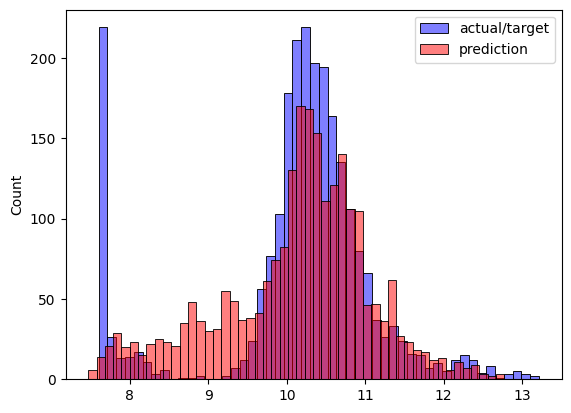

In [286]:
# check how the predictions compare to the actual values
sns.histplot(y_val, color='blue', alpha=0.5, bins=50, label='actual/target')
sns.histplot(y_pred, color='red', alpha=0.5, bins=50, label='prediction')

plt.legend()